In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import distributions

from classes.dpm import Measure, DPM, NormalBaseMeasure
from classes.variables import Normal, InvGamma

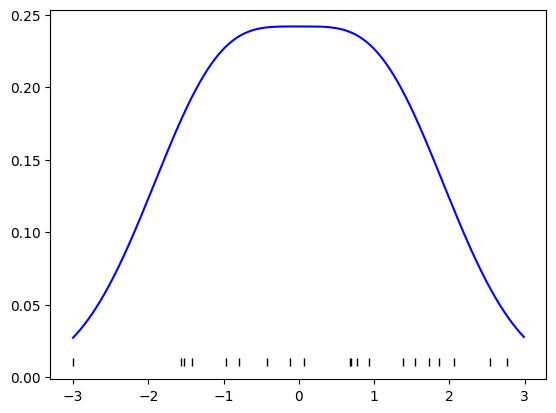

In [27]:
mu1 = -1
mu2 = 1
w1 = 0.5
xmin = -3
xmax = 3
xrange = np.arange(xmin,xmax,0.01)
def f(X, w1=w1) -> np.ndarray:
    return w1*distributions.norm.pdf(X, loc=mu1, scale=1.0) + (1-w1)*distributions.norm.pdf(X, loc=mu2, scale=1.0)

y = np.array([-1.42064144,  0.68615248, -0.12268064, -1.56841365,  0.77278432,
              -2.9957832 , -0.80084822, -1.5276294 , -0.96945657, -0.42762472,
              0.06589666, 1.72620247, 2.53837067, 2.06008666, 0.67753624,
              2.76686856, 1.38138495, 0.92817373, 1.86015938, 1.54262541])


def color_fn():
    colors = ["black", "red", "orange", "green", "blue", "purple", "violet"]
    colors_dict = {}
    for k, v in enumerate(colors):
        colors_dict[k] = v
    colors_dict

colors_dict = color_fn()


# s = distributions.binom.rvs(p=0.5, n=1, size=len(y))
s = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

plt.plot(y, [0.01]*len(y), '|', color="k")
plt.plot(xrange, f(xrange), color="blue")

In [2]:
m = NormalBaseMeasure()

In [2]:
def log_p_to_p(log_p:np.ndarray) -> np.ndarray:
    return np.exp(log_p - np.max(log_p))

def cluster_means(clusters:np.ndarray, y:np.ndarray) -> np.ndarray:
    r = clusters

    uniques, counts = np.unique(r, return_counts=True)

    means = np.zeros_like(uniques)

    for i, u in enumerate(uniques):
        y_u = y[r == u]
        mean = np.mean(y_u)
        means[i] = mean

    return means

def cluster_weights(clusters:np.ndarray) -> np.ndarray:
    r = clusters

    uniques, counts = np.unique(r, return_counts=True)

    return counts / np.sum(counts)

def init_clusters(y:np.ndarray, H=10):
    assert y.ndim == 1

    Z = hierarchy.linkage(y.reshape(-1,1))
    r = hierarchy.cut_tree(Z, n_clusters=10).squeeze()

    means = cluster_means(r, y)
    weights = cluster_weights(r, y)

    return means, weights, r, np.repeat(0, H)

def reset_clusters_index_to_zero(array_1:np.ndarray) -> np.ndarray:
    array_2 = np.empty_like(array_1)
    unique_in_1 = np.unique(array_1)
    arg_sorted = unique_in_1.argsort()

    for j in arg_sorted:
        array_2[np.where(array_1 == unique_in_1[j])] = arg_sorted[j]

    return array_2   


In [3]:
def plot_posterior_density(x, results:dict):
    w = results["w"][:]
    t = results["theta"][:]

    big_X = np.arange(np.min(x)-2, np.max(x)+2, 0.01)

    fig, ax = plt.subplots(1,2, figsize=(12, 6))

    a, b = np.unique(results["n_clusters"], return_counts=True)
    ax[0].bar(x=a, height=b)


    for i in range(len(w)):
        len_w = len(w[i])

        y = []
        mu = t[i][:,0]
        sigma = t[i][:,1]

        for j in range(len_w):
            y.append(w[i][j] * distributions.norm.pdf(big_X, loc=mu[j], scale=sigma[j]))

            
        y = np.sum(y, axis=0)

        ax[1].plot(big_X, y, color="k", alpha=0.05)

    ax[1].plot(x, [0.01]*len(x), '|', color="k")
    ax[1].plot(np.arange(-4, 4, 0.01), f(np.arange(-4, 4, 0.01)))


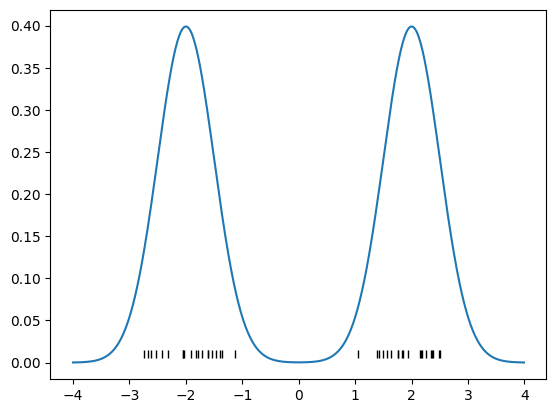

In [4]:
N = 40
w1, w2 = 0.5, 0.5
def f(X, w1=w1) -> np.ndarray:
    return w1*distributions.norm.pdf(X, loc=-2, scale=0.5) + (1-w1)*distributions.norm.pdf(X, loc=2, scale=0.5)

x = np.concatenate((distributions.norm.rvs(loc=-2, scale=0.5, size=20), distributions.norm.rvs(loc=2, scale=0.5, size=20)))
x = np.array([-1.53629916, -1.12899357, -1.60518996, -2.67966081, -1.61694437,
       -2.61227713, -1.82789   , -1.71601606, -2.05882823, -2.41817848,
       -1.77919486, -2.53774749, -2.03994924, -1.91333174, -2.04496604,
       -1.47176651, -2.74409821, -2.30864702, -1.36515045, -1.40199027,
        2.48601161,  1.76388351,  1.48735084,  2.37398349,  2.17628195,
        1.38835878,  2.35179967,  2.25751194,  1.64029622,  2.15503278,
        2.50357713,  1.41946357,  1.75196487,  1.85304607,  2.35279943,
        1.05821439,  2.1743446 ,  1.93528365,  1.82157555,  1.55938066])

plt.plot(x, [0.01]*len(x), '|', color="k")
plt.plot(np.arange(-4, 4, 0.01), f(np.arange(-4, 4, 0.01)))

In [5]:
s = []
for i in range(2):
    for j in range(20):
        s.append(i)

s = np.array(s)
normal = Normal(sigma=3)
invgamma = InvGamma(1, 1)



/Users/btb/Projects/bnp/classes/dpm.py:33: RuntimeWarning: divide by zero encountered in log
  log_p[i] = joint_normal(y, theta=thetas_to_sample[i]) + np.log(sample_coefficients[i])
/Users/btb/Projects/bnp/classes/sampler.py:81: RuntimeWarning: overflow encountered in exp
  r = np.exp(log_r)


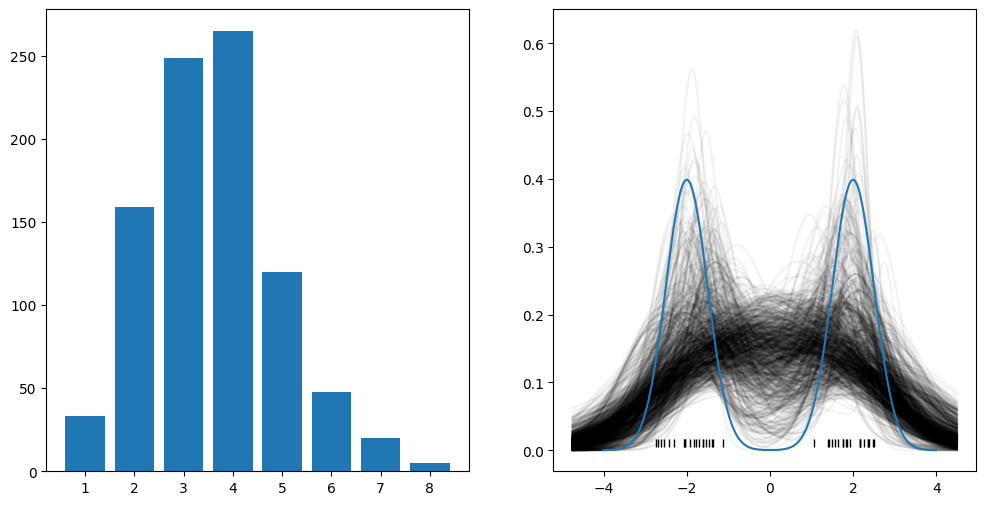

In [7]:
dpm = DPM([normal, invgamma], M=1)

dpm.set_parameters(
    # [[Normal(current=-1), InvGamma(current=1)],
    [[Normal(current=-2), InvGamma(current=1)],
    # [Normal(current=1), InvGamma(current=1)],
    [Normal(current=2), InvGamma(current=1)]]
)

results = dpm_sampler_7(x, s, dpm, lag=1, mh_steps=1)
plot_posterior_density(x, results)

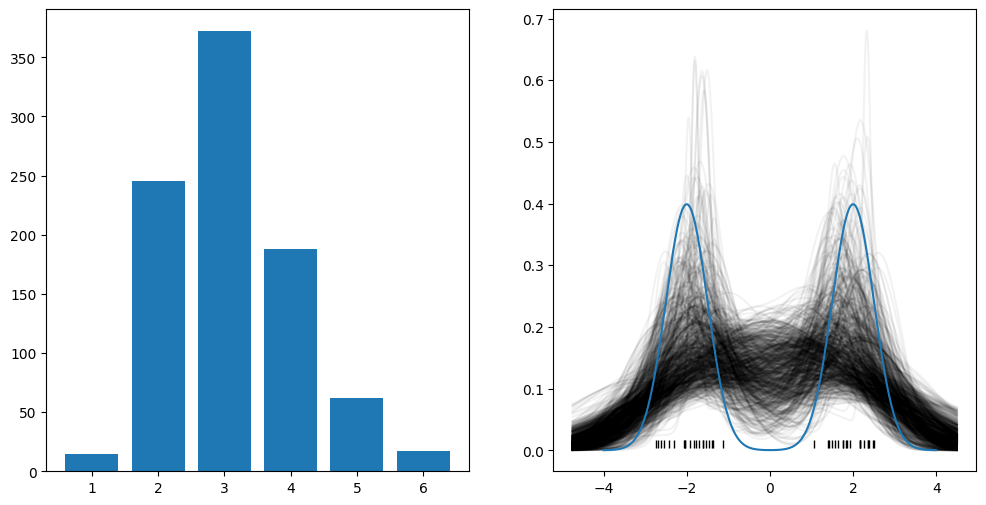

In [26]:
dpm = DPM([normal, InvGamma(1, 1/2)], M=0.5)

dpm.set_parameters(
    # [[Normal(current=-1), InvGamma(current=1)],
    [[Normal(current=-2), InvGamma(current=1)],
    # [Normal(current=1), InvGamma(current=1)],
    [Normal(current=2), InvGamma(current=1)]]
)

results = dpm_sampler_7(x, s, dpm, lag=1, mh_steps=1)
plot_posterior_density(x, results)

/Users/btb/Projects/bnp/classes/dpm.py:33: RuntimeWarning: divide by zero encountered in log
  log_p[i] = joint_normal(y, theta=thetas_to_sample[i]) + np.log(sample_coefficients[i])
/Users/btb/Projects/bnp/classes/sampler.py:81: RuntimeWarning: overflow encountered in exp
  r = np.exp(log_r)


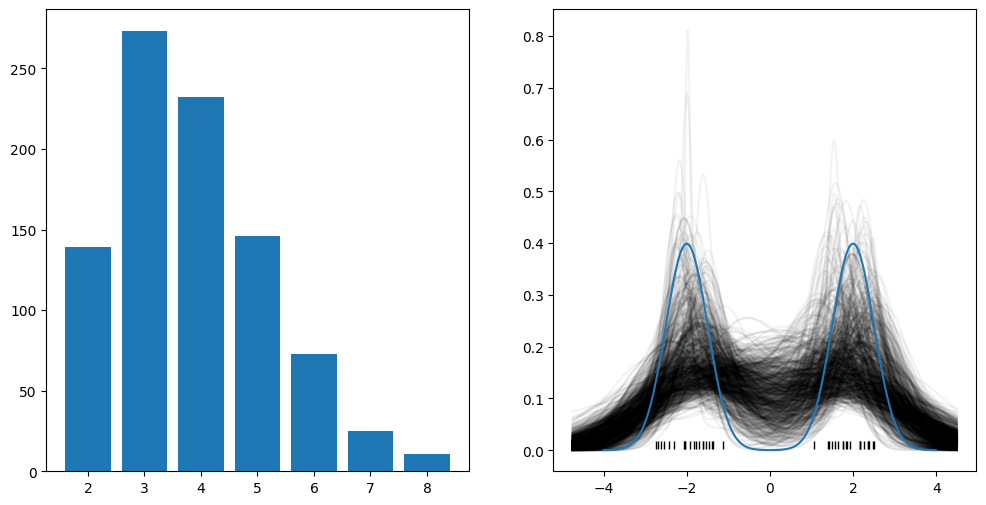

In [23]:
dpm = DPM([normal, InvGamma(1, 1/2)], M=1)

dpm.set_parameters(
    # [[Normal(current=-1), InvGamma(current=1)],
    [[Normal(current=0), InvGamma(current=1)],
    # [Normal(current=1), InvGamma(current=1)],
    [Normal(current=2), InvGamma(current=1)]]
)

results = dpm_sampler_7(x, s, dpm, lag=1, mh_steps=1)
plot_posterior_density(x, results)

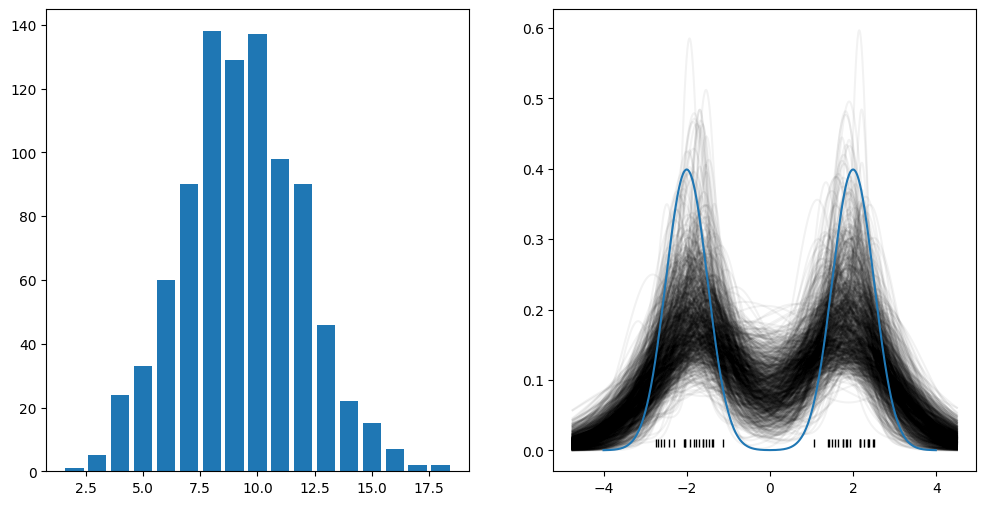

In [19]:

dpm = DPM([normal, invgamma], M=10)

dpm.set_parameters(
    # [[Normal(current=-1), InvGamma(current=1)],
    [[Normal(current=0), InvGamma(current=1)],
    # [Normal(current=1), InvGamma(current=1)],
    [Normal(current=2), InvGamma(current=1)]]
)

results = dpm_sampler_7(x, s, dpm, lag=1, mh_steps=1)
plot_posterior_density(x, results)

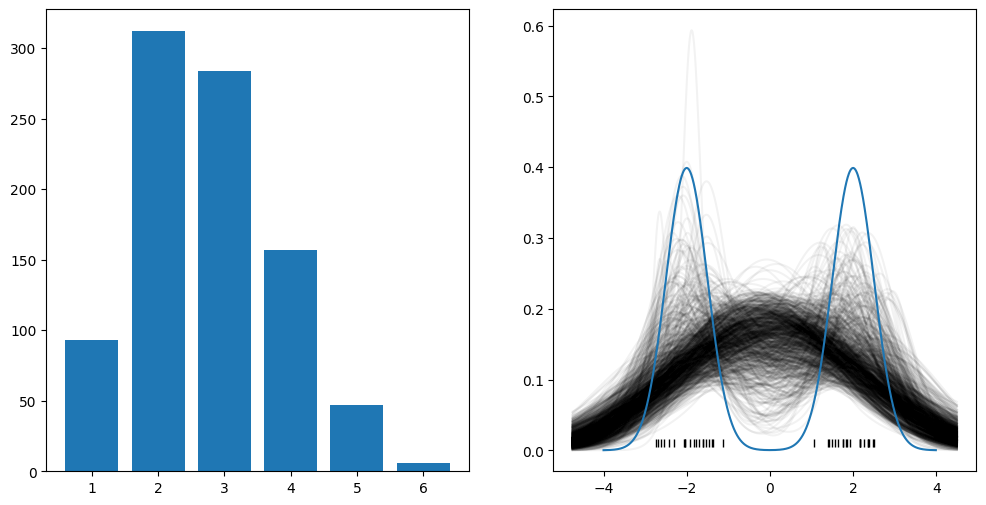

In [21]:

dpm = DPM([normal, invgamma], M=.5)

dpm.set_parameters(
    # [[Normal(current=-1), InvGamma(current=1)],
    [[Normal(current=0), InvGamma(current=1)],
    # [Normal(current=1), InvGamma(current=1)],
    [Normal(current=2), InvGamma(current=1)]]
)

results = dpm_sampler_7(x, s, dpm, lag=1, mh_steps=1)
plot_posterior_density(x, results)

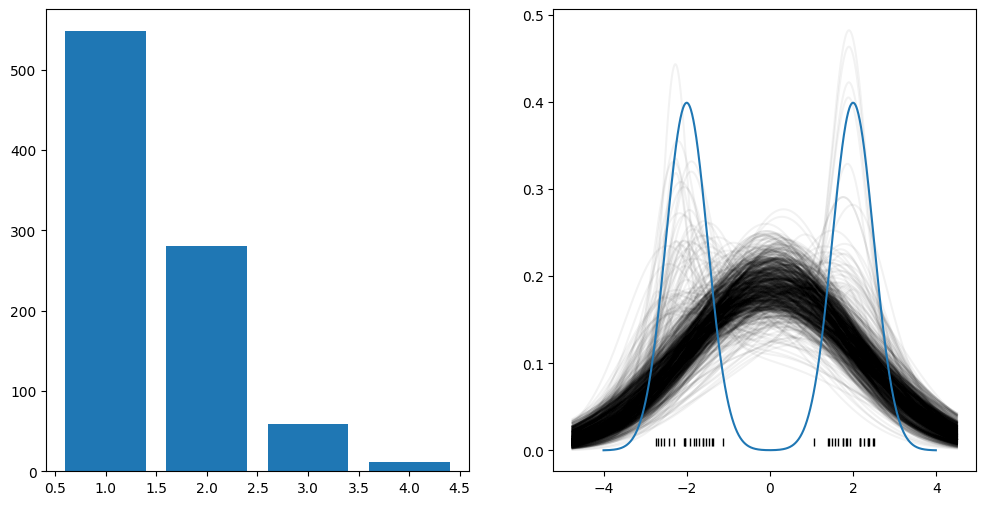

In [22]:

dpm = DPM([normal, invgamma], M=.1)

dpm.set_parameters(
    # [[Normal(current=-1), InvGamma(current=1)],
    [[Normal(current=0), InvGamma(current=1)],
    # [Normal(current=1), InvGamma(current=1)],
    [Normal(current=2), InvGamma(current=1)]]
)

results = dpm_sampler_7(x, s, dpm, lag=1, mh_steps=1)
plot_posterior_density(x, results)